#### FastAI and UNet (Validation/Test)
- Reference: https://www.youtube.com/watch?v=DKzL4zumFi8
- https://walkwithfastai.com/Segmentation

In [1]:
import os
import numpy as np
from pathlib import Path

from fastai.vision.all import *
from fastai.vision.learner import load_learner

cwd = Path.cwd()
path = os.path.join(cwd, "val_images")
WEIGHTS_BIN = os.path.join(cwd, "training_images", "battus10_segmentation_test-4classes-resnet18-b2-e10.pkl")

In [2]:
codes = np.loadtxt(os.path.join(path, "codes.txt"), dtype='str')
name2id = {v:k for k,v in enumerate(codes)}
files = get_image_files(os.path.join(path, "images"))
print("Total Images:", len(files), " \t Sample: ", files[0])
print("Annotations :", name2id)

Total Images: 2  	 Sample:  /home/rahul/workspace/vision/eeb/train_unet/val_images/images/IMG_3870.JPG
Annotations : {'background': 0, 'lepidopteran': 1, 'tags': 2, 'ruler': 3}


/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


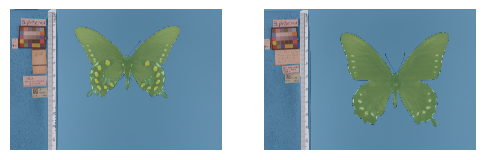

In [3]:
def label_func(image):
    """Function used to label images while training. Required by fastai."""
    return os.path.join(path, "labels", f"{image.stem}.png")

dls = SegmentationDataLoaders.from_label_func(path, bs=2, fnames=files, label_func=label_func, codes=codes)
dls.show_batch()

In [4]:
# Now, loading the model 
print("Skip weight check and use the local weights: ", WEIGHTS_BIN)
learner = load_learner(fname=WEIGHTS_BIN)

Skip weight check and use the local weights:  /home/rahul/workspace/vision/eeb/train_unet/training_images/battus10_segmentation_test-4classes-resnet18-b2-e10.pkl


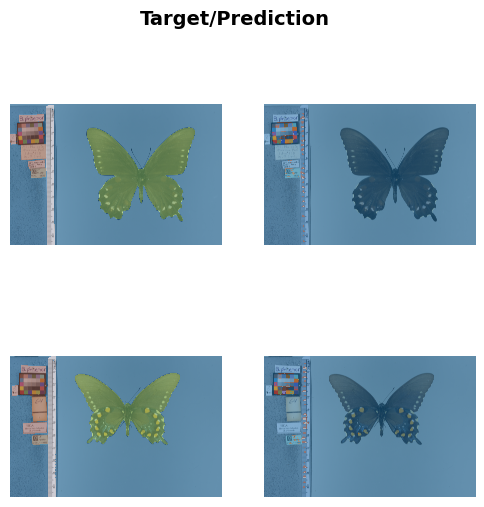

In [5]:
learner.show_results(dl=dls)

In [13]:
learner.tta(dl=dls)

(TensorBase([[[[0.3476, 0.4184, 0.4383,  ..., 0.4958, 0.4695, 0.3863],
               [0.4165, 0.5376, 0.5493,  ..., 0.6861, 0.6518, 0.5056],
               [0.4523, 0.5692, 0.5705,  ..., 0.7691, 0.7825, 0.6283],
               ...,
               [0.6128, 0.7412, 0.8039,  ..., 0.5968, 0.5686, 0.4362],
               [0.4891, 0.6160, 0.6730,  ..., 0.5463, 0.4486, 0.3626],
               [0.3992, 0.4597, 0.5192,  ..., 0.4463, 0.3644, 0.2972]],
 
              [[0.1614, 0.1372, 0.1044,  ..., 0.1019, 0.1046, 0.1230],
               [0.1213, 0.0935, 0.0648,  ..., 0.0439, 0.0556, 0.0814],
               [0.1163, 0.0896, 0.0664,  ..., 0.0272, 0.0347, 0.0649],
               ...,
               [0.0745, 0.0375, 0.0148,  ..., 0.0512, 0.0713, 0.1285],
               [0.0992, 0.0622, 0.0310,  ..., 0.0636, 0.1053, 0.1519],
               [0.1236, 0.1014, 0.0663,  ..., 0.0920, 0.1407, 0.1912]],
 
              [[0.2347, 0.1977, 0.2344,  ..., 0.1551, 0.1851, 0.1894],
               [0.1936, 0.1562,